<a href="https://colab.research.google.com/github/endar1y12/DS_1/blob/main/Challenge_IMDB_Daryanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load data

data = pd.read_excel('/content/IMDB Top250 Movies.xlsx')

In [ ]:
#Cleaning data
#cek missing value
data.isna().sum()

Movies Names                   0
Rating out of 10               0
Count of Ratings               1
Release Date                   0
Budget                         0
Domestic Gross                 0
Domestic Gross2                0
Domestic Weekend Gross         0
Domestic Weekend               0
Domestic Weekend Gross Date    0
Worldwide Gross                5
dtype: int64

In [ ]:
#mengisi missing value
data = data.fillna('N/A')

In [ ]:
#cek missing value kembali
data.isna().sum()

Movies Names                   0
Rating out of 10               0
Count of Ratings               0
Release Date                   0
Budget                         0
Domestic Gross                 0
Domestic Gross2                0
Domestic Weekend Gross         0
Domestic Weekend               0
Domestic Weekend Gross Date    0
Worldwide Gross                0
dtype: int64

In [ ]:
#cek data duplikat
data.duplicated().sum()

0

In [ ]:
#cek data kolom khusus

# Membuat variabel untuk menampung kolom yang ingin dicek
kolom_cek = ["Budget", "Domestic Gross2", "Worldwide Gross"]

for kolom in kolom_cek :
  try:
    pd.to_numeric(data[kolom])
    print("Semua nilai dalam kolom '{}' adalah angka.".format(kolom))
  except ValueError:
    print("ada nilai non-Number dalam kolom".format(kolom))


ada nilai non-Number dalam kolom
ada nilai non-Number dalam kolom
ada nilai non-Number dalam kolom


In [ ]:
# Menghilangkan karakter yang tidak diperlukan
data['Budget'] = data['Budget'].str.replace(r'[^\d,.]', '', regex=True)
data['Budget'] = data['Budget'].str.replace(',', '', regex=True)  # Menghapus koma

# Mengubah tipe data kolom 'Budget' menjadi float dengan penanganan kesalahan
data['Budget'] = pd.to_numeric(data['Budget'], errors='coerce')

In [ ]:
# Membuat fungsi untuk mengkonversi masing-masing nilai mata uang ke dolar
def convert_to_dollar(amount, currency):
    exchange_rates = {'¥': 0.0091, 'FRF': 0.1859, 'NotFound': 0, '€': 1.1752,
                      'DEM': 0.6172, '₹': 0.0136, '£': 1.3853, 'DKK': 0.1575,
                      '₩': 0.00089}
    if currency in exchange_rates:
        return float(amount[1:]) * exchange_rates[currency]
    else:
        return float('NaN')

data

,Movies Names,Rating out of 10,Count of Ratings,Release Date,Budget,Domestic Gross,Domestic Gross2,Domestic Weekend Gross,Domestic Weekend,Domestic Weekend Gross Date,Worldwide Gross
0,The Shawshank Redemption,9.3,2.9M,"October 14, 1994 (India)",25000000,US & Canada,$28767189,US & Canada,$727327,Sep 25 1994,"$28,904,642"
1,The Godfather,9.2,2M,1978 (India),6000000,US & Canada,$136381073,US & Canada,$302393,Mar 19 1972,"$250,342,030"
2,The Dark Knight,9.0,2.9M,"July 18, 2008 (India)",185000000,US & Canada,$534987076,US & Canada,$158411483,Jul 20 2008,"$1,008,486,720"
3,The Godfather: Part II,9.0,1.4M,1979 (India),13000000,US & Canada,$47834595,US & Canada,$171417,Nov 10 2019,"$47,962,897"
4,12 Angry Men,9.0,861K,"April 10, 1957 (United States)",350000,US & Canada,Not Found,US & Canada,Not Found,Not Found,"$2,667"
...,...,...,...,...,...,...,...,...,...,...,...
245,The Help,8.1,491K,"November 25, 2011 (India)",25000000,US & Canada,$169708112,US & Canada,$26044590,Aug 14 2011,"$216,639,112"
246,It Happened One Night,8.1,112K,"February 22, 1934 (United States)",325000,US & Canada,Not Found,US & Canada,Not Found,Not Found,"$14,729"
247,Aladdin,8.0,464K,"December 23, 1994 (India)",28000000,US & Canada,$217350219,US & Canada,$196664,Nov 15 1992,"$504,050,219"
248,Dances with Wolves,8.0,289K,"November 21, 1990 (United States)",22000000,US & Canada,$184208848,US & Canada,$598257,Nov 11 1990,"$424,208,848"


In [ ]:
#kolom yang digunakan
kolom_khusus = ['Domestic Gross2', 'Worldwide Gross']
# data.dropna(subset=kolom_khusus, inplace=True)

# hapus elemen tidak penting seperti $ dan ubah data ke numerik
for kolom in kolom_khusus:
    data[kolom] = pd.to_numeric(data[kolom].replace('[\$,(estimated)]', '', regex=True), errors='coerce')

# simpan ke dalam csv untuk data yang sudah dibersikan
data = data.dropna(subset=kolom_khusus, how='any')
data.to_csv('clean_data.csv', index=False)

In [ ]:
df = pd.read_csv('clean_data.csv')
df

,Movies Names,Rating out of 10,Count of Ratings,Release Date,Budget,Domestic Gross,Domestic Gross2,Domestic Weekend Gross,Domestic Weekend,Domestic Weekend Gross Date,Worldwide Gross
0,The Shawshank Redemption,9,2.9M,"October 14, 1994 (India)",25000000,US & Canada,28767189,US & Canada,$727327,Sep 25 1994,28904642
1,The Godfather,9,2M,1978 (India),6000000,US & Canada,136381073,US & Canada,$302393,Mar 19 1972,250342030
2,The Dark Knight,9,2.9M,"July 18, 2008 (India)",185000000,US & Canada,534987076,US & Canada,$158411483,Jul 20 2008,1008486720
3,The Godfather: Part II,9,1.4M,1979 (India),13000000,US & Canada,47834595,US & Canada,$171417,Nov 10 2019,47962897
4,Schindler's List,9,1.4M,"December 15, 1993 (India)",22000000,US & Canada,96898818,US & Canada,$656636,Dec 19 1993,322161245
...,...,...,...,...,...,...,...,...,...,...,...
213,Amores perros,8,252K,"June 16, 2000 (Mexico)",2000000,US & Canada,5408467,US & Canada,$61047,Apr 1 2001,20908467
214,The Iron Giant,8,226K,"August 6, 1999 (United States)",70000000,US & Canada,23315035,US & Canada,$5732614,Aug 8 1999,23336145
215,The Help,8,491K,"November 25, 2011 (India)",25000000,US & Canada,169708112,US & Canada,$26044590,Aug 14 2011,216639112
216,Aladdin,8,464K,"December 23, 1994 (India)",28000000,US & Canada,217350219,US & Canada,$196664,Nov 15 1992,504050219


In [ ]:
#cek data kolom khusus

# Membuat variabel untuk menampung kolom yang ingin dicek
kolom_cek = ["Budget", "Domestic Gross2", "Worldwide Gross"]

for kolom in kolom_cek :
  try:
    pd.to_numeric(df[kolom])
    print("Semua nilai dalam kolom '{}' adalah angka.".format(kolom))
  except ValueError:
    print("ada nilai non-Number dalam kolom".format(kolom))

Semua nilai dalam kolom 'Budget' adalah angka.
Semua nilai dalam kolom 'Domestic Gross2' adalah angka.
Semua nilai dalam kolom 'Worldwide Gross' adalah angka.


In [ ]:
#cek missing value kembali
df.isnull().sum()

Movies Names                   0
Rating out of 10               0
Count of Ratings               0
Release Date                   0
Budget                         9
Domestic Gross                 0
Domestic Gross2                0
Domestic Weekend Gross         0
Domestic Weekend               0
Domestic Weekend Gross Date    0
Worldwide Gross                0
dtype: int64

In [ ]:
#menghapus outlier
# Hapus nilai di atas persentil ke-95 untuk kedua kolom 'Worldwide Gross' dan 'Budget'
df = df[df['Worldwide Gross'] < df['Worldwide Gross'].quantile(0.95)]
df = df[df['Budget'] < df['Budget'].quantile(0.95)]
pd.set_option('display.float_format', lambda x: '%.0f' % x)


In [ ]:
# Hapus nilai di atas persentil ke-95 untuk kedua kolom 'Domestic Gross2' dan 'Budget'
df = df[df['Domestic Gross2'] < df['Domestic Gross2'].quantile(0.95)]
df = df[df['Budget'] < df['Budget'].quantile(0.95)]
pd.set_option('display.float_format', lambda x: '%.0f' % x)


In [ ]:
# menghitung korelasi antara 'Budget' and 'Worldwide Gross'
correlation = df['Budget'].corr(df['Worldwide Gross'])
print("Korelasi antara Anggaran Produksi dan Pendapatan Total Global: ", correlation)

Korelasi antara Anggaran Produksi dan Pendapatan Total Global:  0.63697842671869


In [ ]:
# menghitung korelasi antara 'Budget' and 'Domestic Gross2'
correlation = df['Budget'].corr(df['Domestic Gross2'])
print("Korelasi antara Anggaran Produksi dan Pendapatan Total Domestik: ", correlation)

Korelasi antara Anggaran Produksi dan Pendapatan Total Domestik:  0.5485866281043122


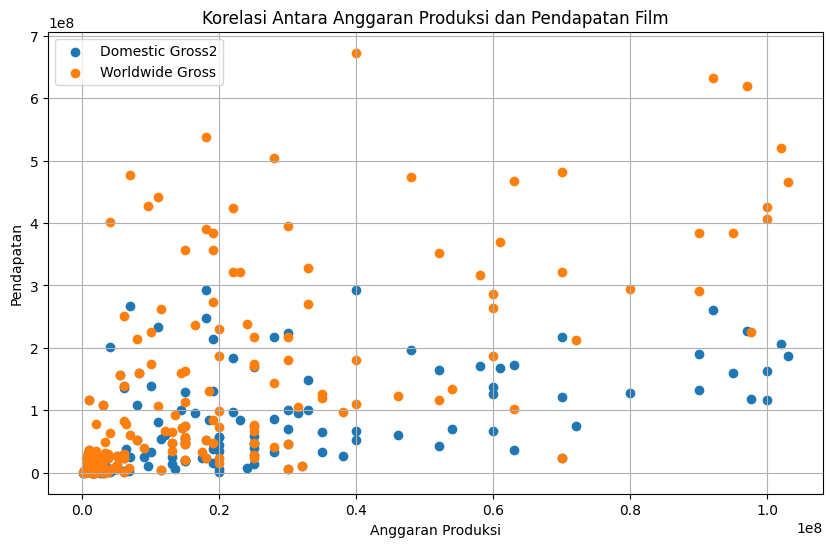

In [ ]:
#visualisasi Diagram Scatter


# Membuat figur dengan ukuran 10x6 inci
plt.figure(figsize=(10, 6))

# Membuat scatter plot antara anggaran produksi dan pendapatan domestik
plt.scatter(df['Budget'], df['Domestic Gross2'], label='Domestic Gross2')

# Menambahkan scatter plot antara anggaran produksi dan pendapatan global
plt.scatter(df['Budget'], df['Worldwide Gross'], label='Worldwide Gross')

# Menambahkan judul dan label sumbu
plt.title('Korelasi Antara Anggaran Produksi dan Pendapatan Film')
plt.xlabel('Anggaran Produksi')
plt.ylabel('Pendapatan')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()


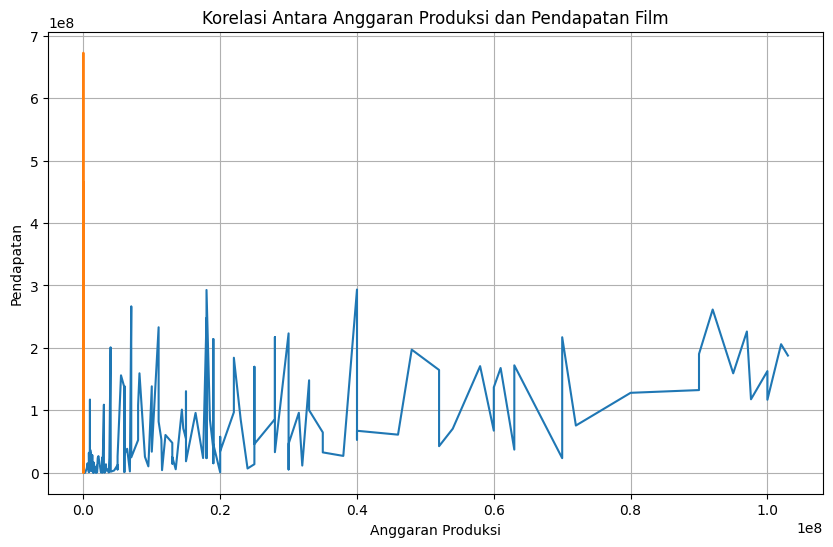

In [ ]:
#Visualisasi Diagram garis

# Membuat figur dengan ukuran 10x6 inci
plt.figure(figsize=(10, 6))

# Mengurutkan data berdasarkan anggaran produksi
df_sorted = df.sort_values(by='Budget')

# Plotting
# Membuat line chart
plt.plot(df_sorted['Budget'],df_sorted['Domestic Gross2'],df_sorted['Worldwide Gross'])

# Menambahkan judul dan label sumbu
plt.title('Korelasi Antara Anggaran Produksi dan Pendapatan Film')
plt.xlabel('Anggaran Produksi')
plt.ylabel('Pendapatan')

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()


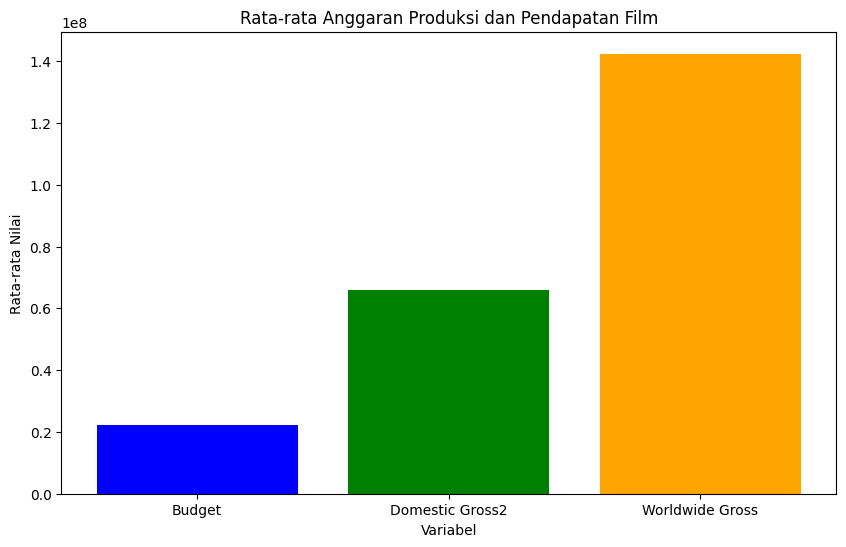

In [ ]:
#visualisasi Diagram Batang


# Menghitung rata-rata anggaran produksi, pendapatan domestik, dan pendapatan global
mean_budget = df['Budget'].mean()
mean_domestic_gross = df['Domestic Gross2'].mean()
mean_worldwide_gross = df['Worldwide Gross'].mean()

# Daftar label untuk sumbu x
labels = ['Budget', 'Domestic Gross2', 'Worldwide Gross']

# Daftar rata-rata nilai
values = [mean_budget, mean_domestic_gross, mean_worldwide_gross]

plt.figure(figsize=(10, 6))

# Membuat diagram batang
plt.bar(labels, values, color=['blue', 'green', 'orange'])

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Anggaran Produksi dan Pendapatan Film')
plt.xlabel('Variabel')
plt.ylabel('Rata-rata Nilai')

# Menampilkan plot
plt.show()


#Kesimpulan
Berdasarkan ketiga visualisasi data tersebut dapat disimpulkan bahwasanya tidak semua anggaran produksi yang semakin banyak, pendapatannya juga akan semakin meningkat.Karena ada beberapa movies yang sedikit anggaran,pendapatanya meningkat. ada juga yang banyak biaya produksi yang dikeluarkan tetapi sedikit pendapatan yang diperoleh.**Namun secara garis besar banyak yang semakin besar anggaran produksi semakin tinggi pula pendapatan nya.**